In [1]:
import yaml
import random
import numpy as np
import time

from reader import Reader
from const import Const
from utils import get_F_example
from clustering import Clusters
from i_merge import IMerger
from Subclusterring import Subclusters

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Если есть желание создать свои данные, то вызвать этот код

In [2]:
X, y = make_blobs(n_samples=200, centers=7, cluster_std=0.6, random_state=0)

ids = [i+1 for i in range(len(X))]
df = pd.DataFrame()
df['id'] = ids
df['X1'] = X[:,0]
df['X2'] = X[:,1]

In [3]:
# ids = []
# X1 = []
# X2 = []
# with open('Two.txt', 'r') as f:
#     for k, line in enumerate(f):
#         if k==0:
#             continue
#         ids.append(int(line.split()[0]))
#         X1.append(float(line.split()[1]))
#         X2.append(float(line.split()[2]))
#         if k>=205:
#             break
# df = pd.DataFrame()
# df['id'] = ids
# df['X1'] = X1
# df['X2'] = X2
    

In [4]:
reader = Reader()

In [5]:
df = reader.read('input.xlsx')

In [6]:
df.head()

,id,X1,X2
0,1,25.388056,10.849605
1,2,26.102651,11.895918
2,3,24.843052,12.847889
3,4,25.282225,12.889494
4,5,26.000284,13.887626


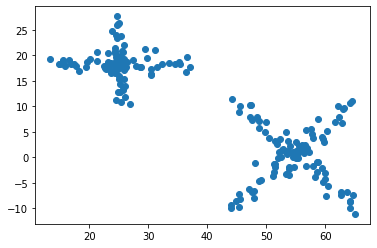

In [7]:
plt.scatter(df['X1'], df['X2'])
plt.show()

# Подбор констант

In [8]:
# const = Const('./example.yaml')
const = Const()

C:\Users\zheny\Documents\clusters\const.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(open("settings.yaml", 'r'))


In [9]:
const.norm(df) # Нормировка

In [10]:
const.get_norms() # Получение норм

{'X1': 3.944426388916148, 'X2': 3.0550950818669724}

In [11]:
a = time.time()
const.calculate_a(df, type_of_optimization=4) # Вычисление а и пересчет констант
b = time.time()
print(b-a)

going down
1.7500722408294678


In [12]:
const.add_Fcolumn(df)

In [13]:
const.config # Вывод параметров

{'conturs': {'min_points': 30,
  'contour_points': 50,
  'min_diff': 0.01,
  'num_of_lenghts': 4},
 'isolated_cluster': {'constU1': 0.05,
  'min_len': 0.1,
  'min_dif': 0.01,
  'divider': 2,
  'max_div_num': 8,
  'merge_threshold': 1.75},
 'subcluster': {'F_step': 0.2},
 'knots': {'min_fuses_num': 15, 'stop_const': 0.1},
 'consts': {'percent_for_norms': 40,
  'round_const': 2,
  'const': 0.25,
  'percent_X': 5,
  'down_steps': 4,
  'up_steps': 6,
  'max_depth': 10,
  'power_koef': 1.16,
  'percent_Y': 33,
  'threshold': 0.8,
  'Y_step': 2.5,
  'a': 0.1}}

In [14]:
# const.save_consts('example2') #Сохранение констант в файл

Researching dataset

In [ ]:
# fig = px.scatter_3d(df, x='X1', y='X2', z='F')
# fig.show()

# Кластеризация

In [ ]:
cluster = Clusters(const.config) 

In [ ]:
df = cluster.get_isolated_clusters(df) # Вычисление кластеров
df.head()

In [ ]:
set(df['cluster_id'])

In [ ]:
for cluster in set(df['cluster_id']):
    plt.scatter(df[df['cluster_id']==cluster]['X1'], df[df['cluster_id']==cluster]['X2'])


In [ ]:
fig = px.scatter_3d(df, x='X1', y='X2', z='F',
              color='cluster_id')
fig.show()

In [ ]:
df.head()

# Merge I

In [15]:
Merger = IMerger(const.config)
Merger.mergeClusters(df)

AssertionError: Clustering step don't done

In [ ]:
plt.scatter(df['X1'],df['X2'], c=df['cluster_id'])

In [16]:
fig = px.scatter_3d(df, x='X1', y='X2', z='F',
              color='cluster_id')
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['id', 'X1', 'X2', 'F'] but received: cluster_id

# Subcluster

In [ ]:
const.config['isolated_cluster']['divider']=2

In [ ]:
sub = Subclusters(const.config)

In [ ]:
df = sub.subclustering(df, type_of_closed=2)

In [ ]:
fig = px.scatter(df, x="X1", y="X2", color="subcluster_id", hover_data=['id', 'F'], )
fig.show()

In [ ]:
df.at[df[df['id']==1].index,'X1']=1

In [ ]:
df